# 1. Import & Load data

## Import Library

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
import ast
warnings.filterwarnings('ignore')
%matplotlib inline

In [61]:
# Agar semua kolom terlihat
pd.set_option('display.max_columns', None)

In [62]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold, train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectKBest
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, roc_auc_score
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, ClassifierMixin

In [63]:
### Generating random color
### untuk visualisasi
import random
def hex_code_colors():
    a = hex(random.randrange(0,256))
    b = hex(random.randrange(0,256))
    c = hex(random.randrange(0,256))
    a = a[2:]
    b = b[2:]
    c = c[2:]
    if len(a)<2:
        a = "0" + a
    if len(b)<2:
        b = "0" + b
    if len(c)<2:
        c = "0" + c
    z = a + b + c
    return "#" + z.upper()
def list_color(n):
  hasil = [hex_code_colors() for i in range(n)]
  return hasil

# tes
list_color(2)

['#F43880', '#CC4751']

## Load Data


In [64]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [65]:
import os
for dirname, _, filenames in os.walk('/content/drive/MyDrive/Jala'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/content/drive/MyDrive/Jala/fasting.csv
/content/drive/MyDrive/Jala/farms.csv
/content/drive/MyDrive/Jala/fastings.csv
/content/drive/MyDrive/Jala/feeds.csv
/content/drive/MyDrive/Jala/harvests.csv
/content/drive/MyDrive/Jala/samplings.csv
/content/drive/MyDrive/Jala/measurements.csv
/content/drive/MyDrive/Jala/feed_tray.csv
/content/drive/MyDrive/Jala/mortalities.csv
/content/drive/MyDrive/Jala/ponds.csv
/content/drive/MyDrive/Jala/cycles.csv


In [66]:
raw_path = '/content/drive/MyDrive/Jala/'

## Feeds

In [67]:
### Terdapat error saat membaca product.csv dengan cara biasa
### Untuk mengatasinya, digunakan data movement
### Loop the data lines
with open(raw_path + 'feeds.csv', 'r') as data:
    # get No of columns in each line
    col_count = [ len(l.split(",")) for l in data.readlines() ]

### Generate column names  (names will be 0, 1, 2, ..., maximum columns - 1)
column_names = [i for i in range(0, max(col_count))]

### Read csv
feeds = pd.read_csv(raw_path + 'feeds.csv', header=None, delimiter=",", names=column_names)

In [68]:
feeds.head()

,0,1,2
0,cycle_id,logged_at,quantity
1,15013,2022-03-29 00:00:00.000,0.5
2,15013,2022-03-29 05:30:00.000,0.5
3,15013,2022-03-29 11:30:00.000,0.5
4,15013,2022-03-29 14:30:00.000,0.5


In [69]:
feeds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 706909 entries, 0 to 706908
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   0       706909 non-null  object
 1   1       706888 non-null  object
 2   2       706888 non-null  object
dtypes: object(3)
memory usage: 16.2+ MB


In [70]:
new_header = feeds.iloc[0] #grab the first row for the header
feeds = feeds[1:] #take the data less the header row
feeds.columns = new_header #set the header row as the df header
#fastings1.rename(columns={'id': 'product_id'}, inplace=True)
feeds.head()

,cycle_id,logged_at,quantity
1,15013,2022-03-29 00:00:00.000,0.5
2,15013,2022-03-29 05:30:00.000,0.5
3,15013,2022-03-29 11:30:00.000,0.5
4,15013,2022-03-29 14:30:00.000,0.5
5,15013,2022-03-30 00:00:00.000,0.5


In [71]:
feeds = feeds.reset_index()
feeds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 706908 entries, 0 to 706907
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   index      706908 non-null  int64 
 1   cycle_id   706908 non-null  object
 2   logged_at  706887 non-null  object
 3   quantity   706887 non-null  object
dtypes: int64(1), object(3)
memory usage: 21.6+ MB


In [72]:
feeds = feeds.drop("logged_at", axis=1)

In [73]:
feeds.isna().sum()

0
index        0
cycle_id     0
quantity    21
dtype: int64

In [74]:
### fill missing value
feeds["quantity"].fillna("0", inplace = True)
##product_df["season"].fillna("Unknown", inplace = True)
#product_df["usage"].fillna("Other", inplace = True)
#product_df["productDisplayName"].fillna("Blank", inplace = True)
#product_df["year"].fillna(product_df['year'].mode()[0], inplace = True)

In [75]:
feeds[
    [
        "quantity",
    ]
] = feeds[
    [
        "quantity",
    ]
].astype(
    "float64"
)


In [76]:
feeds.isna().sum()

0
index       0
cycle_id    0
quantity    0
dtype: int64

## Samplings

In [77]:
### Terdapat error saat membaca product.csv dengan cara biasa
### Untuk mengatasinya, digunakan data movement
### Loop the data lines
with open(raw_path + 'samplings.csv', 'r') as data:
    # get No of columns in each line
    col_count = [ len(l.split(",")) for l in data.readlines() ]

### Generate column names  (names will be 0, 1, 2, ..., maximum columns - 1)
column_names = [i for i in range(0, max(col_count))]

### Read csv
samplings = pd.read_csv(raw_path + 'samplings.csv', header=None, delimiter=",", names=column_names)

In [78]:
samplings.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,cycle_id,updated_at,sampled_at,created_at,average_weight,id,remark,NaN,NaN,NaN,NaN,NaN,NaN
1,18747.0,2022-10-07 03:26:30,2022-09-24,2022-10-07 02:10:49,4.91,32508.0,Size 204\nP/H = 99 kg\nP/K = 2.020 kg\nSamplin...,NaN,NaN,NaN,NaN,NaN,NaN
2,18747.0,2022-10-07 03:27:27,2022-10-01,2022-10-07 03:27:27,7.12,32534.0,"Size 140\nADG = 0,31\nP/H = 139 kg\nP/K = 2.88...",NaN,NaN,NaN,NaN,NaN,NaN
3,18747.0,2022-10-08 01:30:56,2022-10-08,2022-10-08 01:30:56,9.75,32575.0,"Size 103\nADG = 0,38\nP/H = 160 kg\nP/K = 3.94...",NaN,NaN,NaN,NaN,NaN,NaN
4,18747.0,2022-10-15 03:24:26,2022-10-15,2022-10-15 03:24:26,11.15,32864.0,"Size 90\nADG 0,23\nP/H = 180 kg\nP/K = 5.149 k...",NaN,NaN,NaN,NaN,NaN,NaN


In [79]:
samplings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15033 entries, 0 to 15032
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       15033 non-null  object 
 1   1       15033 non-null  object 
 2   2       15033 non-null  object 
 3   3       15033 non-null  object 
 4   4       15033 non-null  object 
 5   5       15033 non-null  object 
 6   6       1340 non-null   object 
 7   7       0 non-null      float64
 8   8       0 non-null      float64
 9   9       0 non-null      float64
 10  10      0 non-null      float64
 11  11      0 non-null      float64
 12  12      0 non-null      float64
dtypes: float64(6), object(7)
memory usage: 1.5+ MB


In [80]:
new_header = samplings.iloc[0] #grab the first row for the header
samplings = samplings[1:] #take the data less the header row
samplings.columns = new_header #set the header row as the df header
#fastings1.rename(columns={'id': 'product_id'}, inplace=True)
samplings.head()

,cycle_id,updated_at,sampled_at,created_at,average_weight,id,remark,NaN,NaN,NaN,NaN,NaN,NaN
1,18747.0,2022-10-07 03:26:30,2022-09-24,2022-10-07 02:10:49,4.91,32508.0,Size 204\nP/H = 99 kg\nP/K = 2.020 kg\nSamplin...,NaN,NaN,NaN,NaN,NaN,NaN
2,18747.0,2022-10-07 03:27:27,2022-10-01,2022-10-07 03:27:27,7.12,32534.0,"Size 140\nADG = 0,31\nP/H = 139 kg\nP/K = 2.88...",NaN,NaN,NaN,NaN,NaN,NaN
3,18747.0,2022-10-08 01:30:56,2022-10-08,2022-10-08 01:30:56,9.75,32575.0,"Size 103\nADG = 0,38\nP/H = 160 kg\nP/K = 3.94...",NaN,NaN,NaN,NaN,NaN,NaN
4,18747.0,2022-10-15 03:24:26,2022-10-15,2022-10-15 03:24:26,11.15,32864.0,"Size 90\nADG 0,23\nP/H = 180 kg\nP/K = 5.149 k...",NaN,NaN,NaN,NaN,NaN,NaN
5,27095.0,2023-11-05 09:03:39,2023-10-07,2023-11-05 09:03:39,4.79,52037.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [81]:
samplings = samplings.reset_index()
samplings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15032 entries, 0 to 15031
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   index           15032 non-null  int64  
 1   cycle_id        15032 non-null  object 
 2   updated_at      15032 non-null  object 
 3   sampled_at      15032 non-null  object 
 4   created_at      15032 non-null  object 
 5   average_weight  15032 non-null  object 
 6   id              15032 non-null  object 
 7   remark          1339 non-null   object 
 8   nan             0 non-null      float64
 9   nan             0 non-null      float64
 10  nan             0 non-null      float64
 11  nan             0 non-null      float64
 12  nan             0 non-null      float64
 13  nan             0 non-null      float64
dtypes: float64(6), int64(1), object(7)
memory usage: 1.6+ MB


In [82]:
#samplings['sampled_at'][1194] = '2020-01-01'

#samplings[1194, ["sampled_at"]].fill("0", inplace = True)

In [83]:
#samplings['sampled_at'][1195] = '2021-01-01'

In [84]:
#samplings['sampled_at'] = samplings['sampled_at'].astype('datetime64')
#samplings['sampled_at'] = pd.to_datetime(samplings['sampled_at'])

In [85]:
samplings.isna().sum()

0
index                 0
cycle_id              0
updated_at            0
sampled_at            0
created_at            0
average_weight        0
id                    0
remark            13693
NaN               15032
NaN               15032
NaN               15032
NaN               15032
NaN               15032
NaN               15032
dtype: int64

In [86]:

samplings = samplings.drop("remark", axis=1)

In [87]:
samplings[
    [
        "average_weight",
    ]
] = samplings[
    [
        "average_weight",
    ]
].astype(
    "float64"
)


## Mortalities

In [88]:
### Terdapat error saat membaca product.csv dengan cara biasa
### Untuk mengatasinya, digunakan data movement
### Loop the data lines
with open(raw_path + 'mortalities.csv', 'r') as data:
    # get No of columns in each line
    col_count = [ len(l.split(",")) for l in data.readlines() ]

### Generate column names  (names will be 0, 1, 2, ..., maximum columns - 1)
column_names = [i for i in range(0, max(col_count))]

### Read csv
mortalities = pd.read_csv(raw_path + 'mortalities.csv', header=None, delimiter=",", names=column_names)

In [89]:
mortalities.head()

,0,1,2,3,4,5,6
0,id,cycle_id,quantity,recorded_at,created_at,updated_at,average_weight
1,185,8007,83334,2021-03-04,2021-03-04 03:46:42,2024-01-08 11:40:40,1.5
2,186,8007,43334,2021-03-05,2021-03-05 06:47:30,2024-01-08 11:40:40,1.5
3,188,8139,870,2021-03-04,2021-03-11 09:00:34,2024-01-08 11:40:40,3.45
4,189,8139,1160,2021-03-05,2021-03-11 09:02:41,2024-01-08 11:40:40,3.45


In [90]:
mortalities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13222 entries, 0 to 13221
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       13222 non-null  object
 1   1       13222 non-null  object
 2   2       13222 non-null  object
 3   3       13222 non-null  object
 4   4       13222 non-null  object
 5   5       13222 non-null  object
 6   6       13222 non-null  object
dtypes: object(7)
memory usage: 723.2+ KB


In [91]:
new_header = mortalities.iloc[0] #grab the first row for the header
mortalities = mortalities[1:] #take the data less the header row
mortalities.columns = new_header #set the header row as the df header
#fastings1.rename(columns={'id': 'product_id'}, inplace=True)
mortalities.head()

,id,cycle_id,quantity,recorded_at,created_at,updated_at,average_weight
1,185,8007,83334,2021-03-04,2021-03-04 03:46:42,2024-01-08 11:40:40,1.5
2,186,8007,43334,2021-03-05,2021-03-05 06:47:30,2024-01-08 11:40:40,1.5
3,188,8139,870,2021-03-04,2021-03-11 09:00:34,2024-01-08 11:40:40,3.45
4,189,8139,1160,2021-03-05,2021-03-11 09:02:41,2024-01-08 11:40:40,3.45
5,190,8139,2030,2021-03-07,2021-03-11 09:03:27,2024-01-08 11:40:40,3.45


In [92]:
mortalities = mortalities.reset_index()
mortalities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13221 entries, 0 to 13220
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   index           13221 non-null  int64 
 1   id              13221 non-null  object
 2   cycle_id        13221 non-null  object
 3   quantity        13221 non-null  object
 4   recorded_at     13221 non-null  object
 5   created_at      13221 non-null  object
 6   updated_at      13221 non-null  object
 7   average_weight  13221 non-null  object
dtypes: int64(1), object(7)
memory usage: 826.4+ KB


In [93]:
mortalities.isna().sum()

0
index             0
id                0
cycle_id          0
quantity          0
recorded_at       0
created_at        0
updated_at        0
average_weight    0
dtype: int64

In [94]:
mortalities[
    [
        "quantity",
        "average_weight",

    ]
] = mortalities[
    [
        "quantity",
        "average_weight",

    ]
].astype(
    "float64"
)


## Cycles

In [95]:
### Terdapat error saat membaca product.csv dengan cara biasa
### Untuk mengatasinya, digunakan data movement
### Loop the data lines
with open(raw_path + 'cycles.csv', 'r') as data:
    # get No of columns in each line
    col_count = [ len(l.split(",")) for l in data.readlines() ]

### Generate column names  (names will be 0, 1, 2, ..., maximum columns - 1)
column_names = [i for i in range(0, max(col_count))]

### Read csv
cycles = pd.read_csv(raw_path + 'cycles.csv', header=None, delimiter=",", names=column_names)

In [96]:
cycles.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24
0,id,pond_id,species_id,total_seed,started_at,finished_at,remark,created_at,updated_at,area,initial_age,limit_weight_per_area,target_cultivation_day,target_size,extracted_at,subscription_type,ordered_at,hatchery_id,total_seed_type,hatchery_name,pond_name,pond_length,pond_width,pond_depth,NaN
1,18876,36294,1.0,331920,2022-10-14 00:00:00.000,2023-01-29 00:00:00.000,NaN,2022-10-14 12:34:23.000,2023-01-30 01:46:27.000,4030.0,0.0,2.0,110.0,35.0,2024-04-12 17:02:22.000,Free,NaN,66.0,net,UD. Benur Ndaru Laut,H,65.0,62.0,1.0,NaN
2,22118,37102,1.0,40000,2023-04-26 00:00:00.000,2023-06-23 00:00:00.000,#TBR01,2023-04-30 22:28:13.000,2023-06-26 05:35:32.000,399.0,0.0,1.25,120.0,100.0,2024-04-12 17:02:22.000,Free,NaN,83.0,net,CV Raja Benur,A1,30.0,20.0,1.0,NaN
3,24088,39154,NaN,357570,2023-08-01 00:00:00.000,2023-10-18 00:00:00.000,#SiklusFarm,2023-07-12 01:13:05.000,2023-10-19 04:23:11.000,2000.0,0.0,1.25,120.0,20.0,2024-04-12 17:02:22.000,Free,2023-07-12 01:13:05.000,1004.0,gross,PT. Tri Karta Pratama - Total Kualitas Prima,A3,50.0,40.0,1.4,NaN
4,17743,20914,1.0,168275,2022-07-19 00:00:00.000,2022-09-29 00:00:00.000,#SiklusCustomerPermadi,2022-08-14 04:40:46.000,2022-10-06 00:09:36.000,1512.0,0.0,1.25,100.0,55.0,2024-04-12 17:02:22.000,Free,NaN,3.0,actual,PT. Central Proteinaprima Tbk,B4,54.0,28.0,1.5,NaN


In [97]:
cycles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2618 entries, 0 to 2617
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       2618 non-null   object 
 1   1       2618 non-null   object 
 2   2       1804 non-null   object 
 3   3       2618 non-null   object 
 4   4       2618 non-null   object 
 5   5       2617 non-null   object 
 6   6       1337 non-null   object 
 7   7       2618 non-null   object 
 8   8       2618 non-null   object 
 9   9       2618 non-null   object 
 10  10      2570 non-null   object 
 11  11      2611 non-null   object 
 12  12      2615 non-null   object 
 13  13      2614 non-null   object 
 14  14      2618 non-null   object 
 15  15      2618 non-null   object 
 16  16      1095 non-null   object 
 17  17      2153 non-null   object 
 18  18      2376 non-null   object 
 19  19      2153 non-null   object 
 20  20      2618 non-null   object 
 21  21      2612 non-null   object 
 22  

In [98]:
new_header = cycles.iloc[0] #grab the first row for the header
cycles = cycles[1:] #take the data less the header row
cycles.columns = new_header #set the header row as the df header
#fastings1.rename(columns={'id': 'product_id'}, inplace=True)
cycles.head()

,id,pond_id,species_id,total_seed,started_at,finished_at,remark,created_at,updated_at,area,initial_age,limit_weight_per_area,target_cultivation_day,target_size,extracted_at,subscription_type,ordered_at,hatchery_id,total_seed_type,hatchery_name,pond_name,pond_length,pond_width,pond_depth,NaN
1,18876,36294,1.0,331920,2022-10-14 00:00:00.000,2023-01-29 00:00:00.000,NaN,2022-10-14 12:34:23.000,2023-01-30 01:46:27.000,4030.0,0.0,2.0,110.0,35.0,2024-04-12 17:02:22.000,Free,NaN,66.0,net,UD. Benur Ndaru Laut,H,65.0,62.0,1.0,NaN
2,22118,37102,1.0,40000,2023-04-26 00:00:00.000,2023-06-23 00:00:00.000,#TBR01,2023-04-30 22:28:13.000,2023-06-26 05:35:32.000,399.0,0.0,1.25,120.0,100.0,2024-04-12 17:02:22.000,Free,NaN,83.0,net,CV Raja Benur,A1,30.0,20.0,1.0,NaN
3,24088,39154,NaN,357570,2023-08-01 00:00:00.000,2023-10-18 00:00:00.000,#SiklusFarm,2023-07-12 01:13:05.000,2023-10-19 04:23:11.000,2000.0,0.0,1.25,120.0,20.0,2024-04-12 17:02:22.000,Free,2023-07-12 01:13:05.000,1004.0,gross,PT. Tri Karta Pratama - Total Kualitas Prima,A3,50.0,40.0,1.4,NaN
4,17743,20914,1.0,168275,2022-07-19 00:00:00.000,2022-09-29 00:00:00.000,#SiklusCustomerPermadi,2022-08-14 04:40:46.000,2022-10-06 00:09:36.000,1512.0,0.0,1.25,100.0,55.0,2024-04-12 17:02:22.000,Free,NaN,3.0,actual,PT. Central Proteinaprima Tbk,B4,54.0,28.0,1.5,NaN
5,17125,34187,1.0,188000,2022-07-07 00:00:00.000,2022-09-20 00:00:00.000,#SiklusTebar,2022-07-12 00:24:30.000,2022-10-15 04:27:24.000,1225.0,0.0,1.25,100.0,55.0,2024-04-12 17:02:22.000,Free,2022-07-12 00:24:30.000,35.0,net,PT Windu Alam Sentosa,A,35.0,35.0,1.2,NaN


In [99]:
cycles = cycles.reset_index()
cycles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2617 entries, 0 to 2616
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   index                   2617 non-null   int64  
 1   id                      2617 non-null   object 
 2   pond_id                 2617 non-null   object 
 3   species_id              1803 non-null   object 
 4   total_seed              2617 non-null   object 
 5   started_at              2617 non-null   object 
 6   finished_at             2616 non-null   object 
 7   remark                  1336 non-null   object 
 8   created_at              2617 non-null   object 
 9   updated_at              2617 non-null   object 
 10  area                    2617 non-null   object 
 11  initial_age             2569 non-null   object 
 12  limit_weight_per_area   2610 non-null   object 
 13  target_cultivation_day  2614 non-null   object 
 14  target_size             2613 non-null   

In [100]:
cycles.isna().sum()

0
index                        0
id                           0
pond_id                      0
species_id                 814
total_seed                   0
started_at                   0
finished_at                  1
remark                    1281
created_at                   0
updated_at                   0
area                         0
initial_age                 48
limit_weight_per_area        7
target_cultivation_day       3
target_size                  4
extracted_at                 0
subscription_type            0
ordered_at                1523
hatchery_id                465
total_seed_type            242
hatchery_name              465
pond_name                    0
pond_length                  6
pond_width                   6
pond_depth                 118
NaN                       2617
dtype: int64

In [101]:
cycles["finished_at"].fillna("0", inplace = True)
cycles["limit_weight_per_area"].fillna("0", inplace = True)
cycles["target_cultivation_day"].fillna("0", inplace = True)
cycles["target_size"].fillna("0", inplace = True)
cycles["pond_length"].fillna("0", inplace = True)
cycles["pond_width"].fillna("0", inplace = True)
cycles["pond_depth"].fillna("0", inplace = True)

cycles = cycles.drop("species_id", axis=1)
cycles = cycles.drop("remark", axis=1)
cycles = cycles.drop("initial_age", axis=1)
cycles = cycles.drop("ordered_at", axis=1)
cycles = cycles.drop("hatchery_id", axis=1)
cycles = cycles.drop("total_seed_type", axis=1)
cycles = cycles.drop("hatchery_name", axis=1)

In [102]:
cycles[
    [
        "total_seed",
        "area",
        "limit_weight_per_area",
        "target_cultivation_day",
        "target_size",
        "pond_length",
        "pond_width",
        "pond_depth",
    ]
] = cycles[
    [
        "total_seed",
        "area",
        "limit_weight_per_area",
        "target_cultivation_day",
        "target_size",
        "pond_length",
        "pond_width",
        "pond_depth",
    ]
].astype(
    "float64"
)


## Gabung Data

In [103]:
df1 = pd.merge(cycles,mortalities, left_on = 'id', right_on = 'cycle_id', how='left')
df2 = pd.merge(df1, samplings, left_on = 'cycle_id', right_on = 'cycle_id', how='left')
df2 = df2.drop("index_x", axis=1)
df2 = df2.drop("index_y", axis=1)
df3 = pd.merge(df2, feeds, left_on = 'cycle_id', right_on = 'cycle_id', how='left')
df3
#df3 = df3.drop("index_x", axis=1)
#df3 = df3.drop("index_y", axis=1)
#df4 = pd.merge(df3, feeds, left_on = 'cycle_id', right_on = 'cycle_id', how='left')

,id_x,pond_id,total_seed,started_at,finished_at,created_at_x,updated_at_x,area,limit_weight_per_area,target_cultivation_day,target_size,extracted_at,subscription_type,pond_name,pond_length,pond_width,pond_depth,NaN,id_y,cycle_id,quantity_x,recorded_at,created_at_y,updated_at_y,average_weight_x,index_x,updated_at,sampled_at,created_at,average_weight_y,id,NaN,NaN,NaN,NaN,NaN,NaN,index_y,quantity_y
0,18876,36294,331920.0,2022-10-14 00:00:00.000,2023-01-29 00:00:00.000,2022-10-14 12:34:23.000,2023-01-30 01:46:27.000,4030.0,2.00,110.0,35.0,2024-04-12 17:02:22.000,Free,H,65.0,62.0,1.0,NaN,11299,18876,20.0,2022-11-08,2022-11-08 03:17:01,2024-01-08 11:40:40,1.58,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,18876,36294,331920.0,2022-10-14 00:00:00.000,2023-01-29 00:00:00.000,2022-10-14 12:34:23.000,2023-01-30 01:46:27.000,4030.0,2.00,110.0,35.0,2024-04-12 17:02:22.000,Free,H,65.0,62.0,1.0,NaN,11325,18876,20.0,2022-11-10,2022-11-10 06:29:28,2024-01-08 11:40:40,1.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,18876,36294,331920.0,2022-10-14 00:00:00.000,2023-01-29 00:00:00.000,2022-10-14 12:34:23.000,2023-01-30 01:46:27.000,4030.0,2.00,110.0,35.0,2024-04-12 17:02:22.000,Free,H,65.0,62.0,1.0,NaN,11326,18876,20.0,2022-11-09,2022-11-10 06:30:02,2024-01-08 11:40:40,1.64,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,18876,36294,331920.0,2022-10-14 00:00:00.000,2023-01-29 00:00:00.000,2022-10-14 12:34:23.000,2023-01-30 01:46:27.000,4030.0,2.00,110.0,35.0,2024-04-12 17:02:22.000,Free,H,65.0,62.0,1.0,NaN,11354,18876,73.0,2022-11-12,2022-11-12 10:16:17,2024-01-08 11:40:40,1.71,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,18876,36294,331920.0,2022-10-14 00:00:00.000,2023-01-29 00:00:00.000,2022-10-14 12:34:23.000,2023-01-30 01:46:27.000,4030.0,2.00,110.0,35.0,2024-04-12 17:02:22.000,Free,H,65.0,62.0,1.0,NaN,11363,18876,29.0,2022-11-13,2022-11-13 01:02:52,2024-01-08 11:40:40,1.71,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1927304,15868,32398,150000.0,2022-04-28 00:00:00.000,2022-06-21 00:00:00.000,2022-05-08 16:02:51.000,2022-08-23 03:12:20.000,1600.0,1.25,100.0,55.0,2024-04-12 17:02:22.000,Free,B 4.1,45.0,35.0,2.0,NaN,6119,15868,1800.0,2022-06-18,2022-06-18 14:50:48,2024-01-08 11:40:40,5.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,72867.0,3.5
1927305,15868,32398,150000.0,2022-04-28 00:00:00.000,2022-06-21 00:00:00.000,2022-05-08 16:02:51.000,2022-08-23 03:12:20.000,1600.0,1.25,100.0,55.0,2024-04-12 17:02:22.000,Free,B 4.1,45.0,35.0,2.0,NaN,6119,15868,1800.0,2022-06-18,2022-06-18 14:50:48,2024-01-08 11:40:40,5.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,72868.0,3.5
1927306,15868,32398,150000.0,2022-04-28 00:00:00.000,2022-06-21 00:00:00.000,2022-05-08 16:02:51.000,2022-08-23 03:12:20.000,1600.0,1.25,100.0,55.0,2024-04-12 17:02:22.000,Free,B 4.1,45.0,35.0,2.0,NaN,6119,15868,1800.0,2022-06-18,2022-06-18 14:50:48,2024-01-08 11:40:40,5.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,72869.0,3.5
1927307,15868,32398,150000.0,2022-04-28 00:00:00.000,2022-06-21 00:00:00.000,2022-05-08 16:02:51.000,2022-08-23 03:12:20.000,1600.0,1.25,100.0,55.0,2024-04-12 17:02:22.000,Free,B 4.1,45.0,35.0,2.0,NaN,6119,15868,1800.0,2022-06-18,2022-06-18 14:50:48,2024-01-08 11:40:40,5.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,72870.0,3.5


In [104]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1927309 entries, 0 to 1927308
Data columns (total 39 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   id_x                    object 
 1   pond_id                 object 
 2   total_seed              float64
 3   started_at              object 
 4   finished_at             object 
 5   created_at_x            object 
 6   updated_at_x            object 
 7   area                    float64
 8   limit_weight_per_area   float64
 9   target_cultivation_day  float64
 10  target_size             float64
 11  extracted_at            object 
 12  subscription_type       object 
 13  pond_name               object 
 14  pond_length             float64
 15  pond_width              float64
 16  pond_depth              float64
 17  nan                     float64
 18  id_y                    object 
 19  cycle_id                object 
 20  quantity_x              float64
 21  recorded_at             object 

In [105]:
df3['SurvRate'] = df3['quantity_x'] / df3['total_seed']
df3.head()

,id_x,pond_id,total_seed,started_at,finished_at,created_at_x,updated_at_x,area,limit_weight_per_area,target_cultivation_day,target_size,extracted_at,subscription_type,pond_name,pond_length,pond_width,pond_depth,NaN,id_y,cycle_id,quantity_x,recorded_at,created_at_y,updated_at_y,average_weight_x,index_x,updated_at,sampled_at,created_at,average_weight_y,id,NaN,NaN,NaN,NaN,NaN,NaN,index_y,quantity_y,SurvRate
0,18876,36294,331920.0,2022-10-14 00:00:00.000,2023-01-29 00:00:00.000,2022-10-14 12:34:23.000,2023-01-30 01:46:27.000,4030.0,2.0,110.0,35.0,2024-04-12 17:02:22.000,Free,H,65.0,62.0,1.0,NaN,11299,18876,20.0,2022-11-08,2022-11-08 03:17:01,2024-01-08 11:40:40,1.58,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000060
1,18876,36294,331920.0,2022-10-14 00:00:00.000,2023-01-29 00:00:00.000,2022-10-14 12:34:23.000,2023-01-30 01:46:27.000,4030.0,2.0,110.0,35.0,2024-04-12 17:02:22.000,Free,H,65.0,62.0,1.0,NaN,11325,18876,20.0,2022-11-10,2022-11-10 06:29:28,2024-01-08 11:40:40,1.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000060
2,18876,36294,331920.0,2022-10-14 00:00:00.000,2023-01-29 00:00:00.000,2022-10-14 12:34:23.000,2023-01-30 01:46:27.000,4030.0,2.0,110.0,35.0,2024-04-12 17:02:22.000,Free,H,65.0,62.0,1.0,NaN,11326,18876,20.0,2022-11-09,2022-11-10 06:30:02,2024-01-08 11:40:40,1.64,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000060
3,18876,36294,331920.0,2022-10-14 00:00:00.000,2023-01-29 00:00:00.000,2022-10-14 12:34:23.000,2023-01-30 01:46:27.000,4030.0,2.0,110.0,35.0,2024-04-12 17:02:22.000,Free,H,65.0,62.0,1.0,NaN,11354,18876,73.0,2022-11-12,2022-11-12 10:16:17,2024-01-08 11:40:40,1.71,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000220
4,18876,36294,331920.0,2022-10-14 00:00:00.000,2023-01-29 00:00:00.000,2022-10-14 12:34:23.000,2023-01-30 01:46:27.000,4030.0,2.0,110.0,35.0,2024-04-12 17:02:22.000,Free,H,65.0,62.0,1.0,NaN,11363,18876,29.0,2022-11-13,2022-11-13 01:02:52,2024-01-08 11:40:40,1.71,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000087


In [106]:
df3['BioMassa'] = df3['SurvRate'] * df3['total_seed'] * df3['average_weight_x']
df3.head()

,id_x,pond_id,total_seed,started_at,finished_at,created_at_x,updated_at_x,area,limit_weight_per_area,target_cultivation_day,target_size,extracted_at,subscription_type,pond_name,pond_length,pond_width,pond_depth,NaN,id_y,cycle_id,quantity_x,recorded_at,created_at_y,updated_at_y,average_weight_x,index_x,updated_at,sampled_at,created_at,average_weight_y,id,NaN,NaN,NaN,NaN,NaN,NaN,index_y,quantity_y,SurvRate,BioMassa
0,18876,36294,331920.0,2022-10-14 00:00:00.000,2023-01-29 00:00:00.000,2022-10-14 12:34:23.000,2023-01-30 01:46:27.000,4030.0,2.0,110.0,35.0,2024-04-12 17:02:22.000,Free,H,65.0,62.0,1.0,NaN,11299,18876,20.0,2022-11-08,2022-11-08 03:17:01,2024-01-08 11:40:40,1.58,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000060,31.60
1,18876,36294,331920.0,2022-10-14 00:00:00.000,2023-01-29 00:00:00.000,2022-10-14 12:34:23.000,2023-01-30 01:46:27.000,4030.0,2.0,110.0,35.0,2024-04-12 17:02:22.000,Free,H,65.0,62.0,1.0,NaN,11325,18876,20.0,2022-11-10,2022-11-10 06:29:28,2024-01-08 11:40:40,1.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000060,33.40
2,18876,36294,331920.0,2022-10-14 00:00:00.000,2023-01-29 00:00:00.000,2022-10-14 12:34:23.000,2023-01-30 01:46:27.000,4030.0,2.0,110.0,35.0,2024-04-12 17:02:22.000,Free,H,65.0,62.0,1.0,NaN,11326,18876,20.0,2022-11-09,2022-11-10 06:30:02,2024-01-08 11:40:40,1.64,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000060,32.80
3,18876,36294,331920.0,2022-10-14 00:00:00.000,2023-01-29 00:00:00.000,2022-10-14 12:34:23.000,2023-01-30 01:46:27.000,4030.0,2.0,110.0,35.0,2024-04-12 17:02:22.000,Free,H,65.0,62.0,1.0,NaN,11354,18876,73.0,2022-11-12,2022-11-12 10:16:17,2024-01-08 11:40:40,1.71,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000220,124.83
4,18876,36294,331920.0,2022-10-14 00:00:00.000,2023-01-29 00:00:00.000,2022-10-14 12:34:23.000,2023-01-30 01:46:27.000,4030.0,2.0,110.0,35.0,2024-04-12 17:02:22.000,Free,H,65.0,62.0,1.0,NaN,11363,18876,29.0,2022-11-13,2022-11-13 01:02:52,2024-01-08 11:40:40,1.71,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000087,49.59


In [107]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1927309 entries, 0 to 1927308
Data columns (total 41 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   id_x                    object 
 1   pond_id                 object 
 2   total_seed              float64
 3   started_at              object 
 4   finished_at             object 
 5   created_at_x            object 
 6   updated_at_x            object 
 7   area                    float64
 8   limit_weight_per_area   float64
 9   target_cultivation_day  float64
 10  target_size             float64
 11  extracted_at            object 
 12  subscription_type       object 
 13  pond_name               object 
 14  pond_length             float64
 15  pond_width              float64
 16  pond_depth              float64
 17  nan                     float64
 18  id_y                    object 
 19  cycle_id                object 
 20  quantity_x              float64
 21  recorded_at             object 

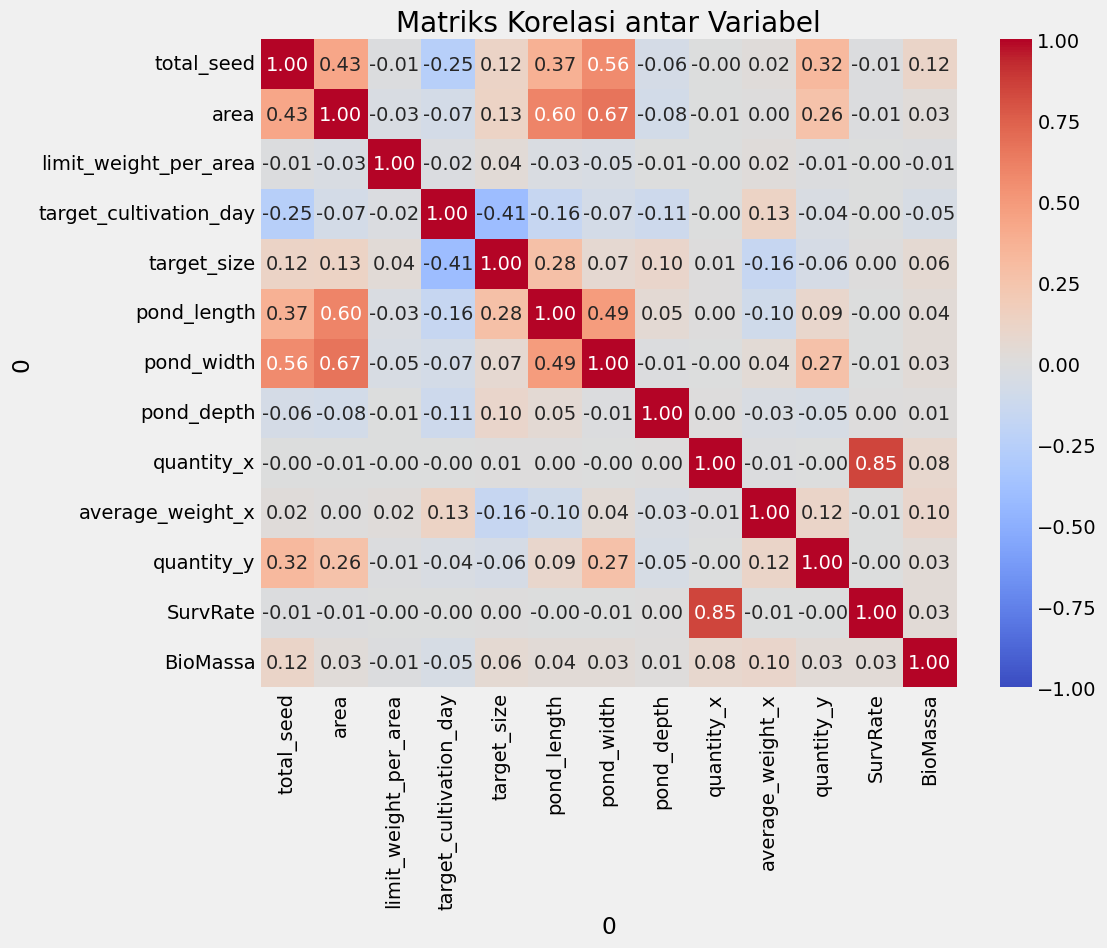

In [108]:
# Pilih subset kolom yang diinginkan tanpa kolom 'Year'
selected_columns = [
    'total_seed',
    'area',
    'limit_weight_per_area',
    'target_cultivation_day',
    'target_size',
    'pond_length',
    'pond_width', 'pond_depth',
    'quantity_x',
    'average_weight_x',
    'quantity_y', 'SurvRate',
    'BioMassa'
]
df_subset = df3[selected_columns]

# Hitung korelasi antar variabel
correlation_matrix = df_subset.corr()

# Plot matriks korelasi menggunakan heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1,)
plt.title('Matriks Korelasi antar Variabel')
plt.show()

In [117]:
df_subset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1927309 entries, 0 to 1927308
Data columns (total 13 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   total_seed              float64
 1   area                    float64
 2   limit_weight_per_area   float64
 3   target_cultivation_day  float64
 4   target_size             float64
 5   pond_length             float64
 6   pond_width              float64
 7   pond_depth              float64
 8   quantity_x              float64
 9   average_weight_x        float64
 10  quantity_y              float64
 11  SurvRate                float64
 12  BioMassa                float64
dtypes: float64(13)
memory usage: 191.2 MB


In [139]:
df_subset.isna().sum()

0
total_seed                0
area                      0
limit_weight_per_area     0
target_cultivation_day    0
target_size               0
pond_length               0
pond_width                0
pond_depth                0
quantity_x                0
average_weight_x          0
quantity_y                0
SurvRate                  0
BioMassa                  0
dtype: int64

In [138]:
df_subset["quantity_x"].fillna("0", inplace = True)
df_subset["average_weight_x"].fillna("0", inplace = True)
df_subset["quantity_y"].fillna("0", inplace = True)
df_subset["SurvRate"].fillna("0", inplace = True)
df_subset["BioMassa"].fillna("0", inplace = True)